<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

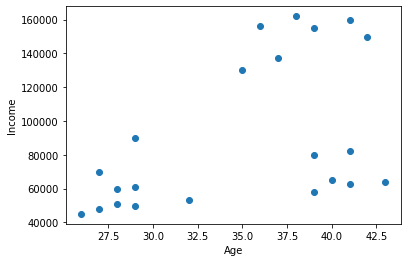

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [7]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [8]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [9]:
km.cluster_centers_


array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [10]:
km.cluster_centers_[:,0]
km.cluster_centers_[:,1]
#km.cluster_centers_[:,2]

array([150000.        ,  80500.        ,  56136.36363636])

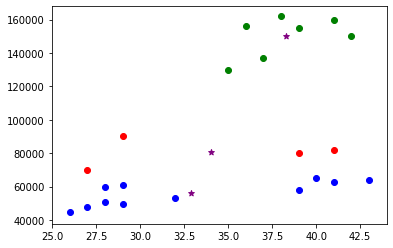

In [11]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['SIncome($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['SAge'] = scaler.transform(df[['Age']])

In [13]:
df.head()

,Name,Age,Income($),cluster,SIncome($),SAge
0,Rob,27,70000,1,0.213675,0.058824
1,Michael,29,90000,1,0.384615,0.176471
2,Mohan,29,61000,2,0.136752,0.176471
3,Ismail,28,60000,2,0.128205,0.117647
4,Kory,42,150000,0,0.897436,0.941176


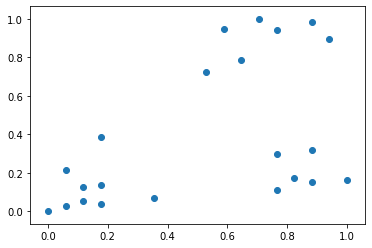

In [14]:
plt.scatter(df.SAge,df['SIncome($)'])

In [15]:
km1 = KMeans(n_clusters=3)
y_predicted1 = km1.fit_predict(df[['SAge','SIncome($)']])
y_predicted1

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [16]:
df['Scluster']=y_predicted1
df.head()

,Name,Age,Income($),cluster,SIncome($),SAge,Scluster
0,Rob,27,70000,1,0.213675,0.058824,1
1,Michael,29,90000,1,0.384615,0.176471,1
2,Mohan,29,61000,2,0.136752,0.176471,1
3,Ismail,28,60000,2,0.128205,0.117647,1
4,Kory,42,150000,0,0.897436,0.941176,2


In [17]:
km1.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [20]:
ndf1=df[df.Scluster==0]
ndf2=df[df.Scluster==1]
ndf3=df[df.Scluster==2]

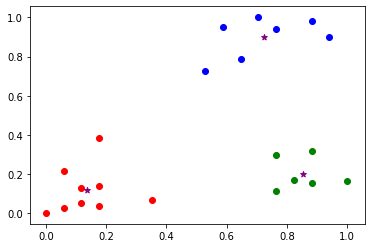

In [21]:
plt.scatter(ndf1.SAge,ndf1['SIncome($)'],color='green')
plt.scatter(ndf2.SAge,ndf2['SIncome($)'],color='red')
plt.scatter(ndf3.SAge,ndf3['SIncome($)'],color='blue')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

<h4 style='color:purple'>Elbow Plot</h4>

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

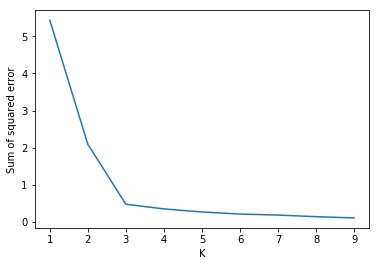

In [211]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [9]:
sse

[39748148458.545456,
 3318233941.161905,
 1577046058.8831167,
 814746044.2545455,
 296500418.0952381,
 231967084.4619048,
 174800337.70000005,
 119633613.78333332,
 92633459.7]

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k